In [1]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy
import scipy.io as sio
from scipy import stats
import seaborn as sns
dirpath = os.getcwd()


In [2]:
import sys
sys.executable


'/Library/Developer/CommandLineTools/usr/bin/python3'

In [3]:
dirpath = os.getcwd()
file = os.path.join(dirpath, 'Overview3_Sheet9.xlsx') #)
xl = pd.ExcelFile(file)
df = xl.sheet_names

In [4]:
df = xl.parse(0)
data = df.iloc[:,:4]
data

,Behavioral Accuracy (Expected-Uninformative),Classification Accuracy (Expected-Uninformative),Region
0,0.000100,-0.039141,Contra-lateral
1,0.043887,-0.033320,Contra-lateral
2,0.096117,-0.031048,Contra-lateral
3,0.075839,0.039916,Contra-lateral
4,0.085233,0.005429,Contra-lateral
5,0.023823,-0.027953,Contra-lateral
6,0.068790,-0.039133,Contra-lateral
7,0.070648,0.059108,Contra-lateral
8,0.054311,0.051549,Contra-lateral
9,0.085600,0.059881,Contra-lateral


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


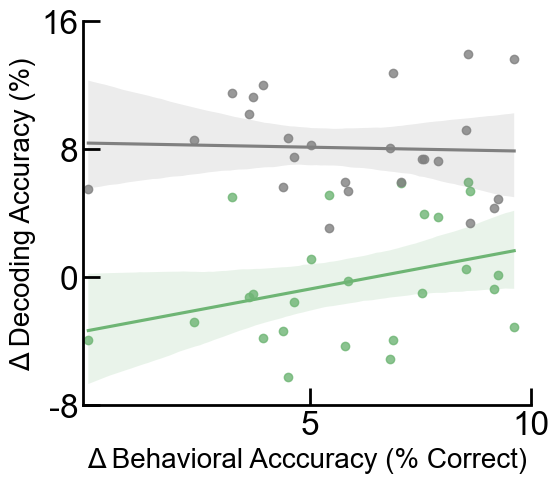

In [5]:
reg_dct = ['Contra-lateral', 'Ipsi-lateral']

fig, ax = plt.subplots()

#adjustable colors
colors = ["#6eb574","grey"]


da0 = data[data['Region']==reg_dct[0]]
da1 = data[data['Region']==reg_dct[1]]
x = "Behavioral Accuracy (Expected-Uninformative)"
y = "Classification Accuracy (Expected-Uninformative)"
axis = sns.regplot(x=x,y=y, data=da0,
                    scatter_kws={"color": colors[0]}, 
                    line_kws={"color": colors[0]}, 
                    label='small', ax=ax)
sns.regplot(x=x,y=y, data=da1,
                    scatter_kws={"color": colors[1]}, 
                    line_kws={"color": colors[1]}, 
                    label='small', ax=ax)

axis.set_xbound(-0.0011,0.098)
axis.set_ylabel('Δ Decoding Accuracy (%)',fontsize=20, fontname ='Arial')
axis.set_xlabel('Δ Behavioral Acccuracy (% Correct)',fontsize=20, fontname ='Arial')
axis.tick_params(labelsize=10)
axis.spines['right'].set_visible(False)
axis.spines['top'].set_visible(False)
#axis.spines['bottom'].set_visible(False)
axis.spines['left'].set_linewidth(2)
axis.spines['bottom'].set_linewidth(2)
axis.set_ylim([-0.08,0.16])    
axis.set_yticks([-0.08,0,0.08,0.16], fontname='Arial')
axis.set_yticklabels(['-8','0','8','16'],fontname='Arial')
axis.set_xlim([-0.001,0.1])
axis.set_xticks([0.05,0.1], fontname='Arial')
axis.set_xticklabels(['5','10'],fontname='Arial')
axis.tick_params(axis='both', which='major', direction='in',length=12, labelsize=24, width=2)

    
plt.subplots_adjust(left=1.5,
                    bottom=0.1, 
                    right=2.2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

#save plot
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles,reg_dct, fontsize = 18, frameon=False, loc='upper left')
plt.legend().remove()
#fig = ax.get_figure()
#plt.tight_layout()
#fig.tight_layout()

fig.savefig("Fig5C_comb.jpg",dpi=600,bbox_inches='tight')
plt.savefig('Fig5C_comb.eps', dpi = 600, format='eps')

## Version 2

In [15]:
from scipy import stats